In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
controldf=pd.read_csv('control.csv')
controldf=controldf.dropna()
experimentdf=pd.read_csv('experiment.csv',parse_dates=['Date'])
experimentdf=experimentdf.dropna()

In [8]:
controldf.head(1)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892


In [9]:
experimentdf.head(1)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion
0,"Sat, Oct 11",7716.0,686.0,105.0,34.0,0.153061,0.32381,0.049563


In [10]:
controldf['control']=1
controldf.head(2)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892,1
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,0.188703,0.476190,0.089859,1


In [11]:
experimentdf['control']=0
experimentdf.head()

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
0,"Sat, Oct 11",7716.0,686.0,105.0,34.0,0.153061,0.323810,0.049563,0
1,"Sun, Oct 12",9288.0,785.0,116.0,91.0,0.147771,0.784483,0.115924,0
2,"Mon, Oct 13",10480.0,884.0,145.0,79.0,0.164027,0.544828,0.089367,0
3,"Tue, Oct 14",9867.0,827.0,138.0,92.0,0.166868,0.666667,0.111245,0
4,"Wed, Oct 15",9793.0,832.0,140.0,94.0,0.168269,0.671429,0.112981,0


In [12]:
frame=[controldf,experimentdf]
webdf=pd.concat(frame)

# 1. Choose one variable and plot that variable four different ways.

In [13]:
groupdata = webdf.groupby(webdf['control']).mean()
groupdata.reset_index(level=0, inplace=True)
groupdata

,control,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion
0,0,9189.652174,750.434783,148.826087,84.565217,0.199566,0.573140,0.113373
1,1,9224.478261,751.869565,164.565217,88.391304,0.220351,0.539797,0.118269


## Bar Chart  Pro : Easy to spot the different between 2 variables
##                   Con : Only if it has obvious, and can't detect relationship with other variables

## Pie Chart  Pro : Similar to bar chart where it shows different between variables easiler 
##                  Con : Also same Con as Bar chart
## Violinplot Pro : Easy to see the distribution of variables in term of mean, tail, show understand the frequencies of a variable
##                     Con : Same Con as Bar chart
## Scatter chart Pro : Show relationship between variables
##                       Cont : Can't show the distribution of a variable for comparison
     

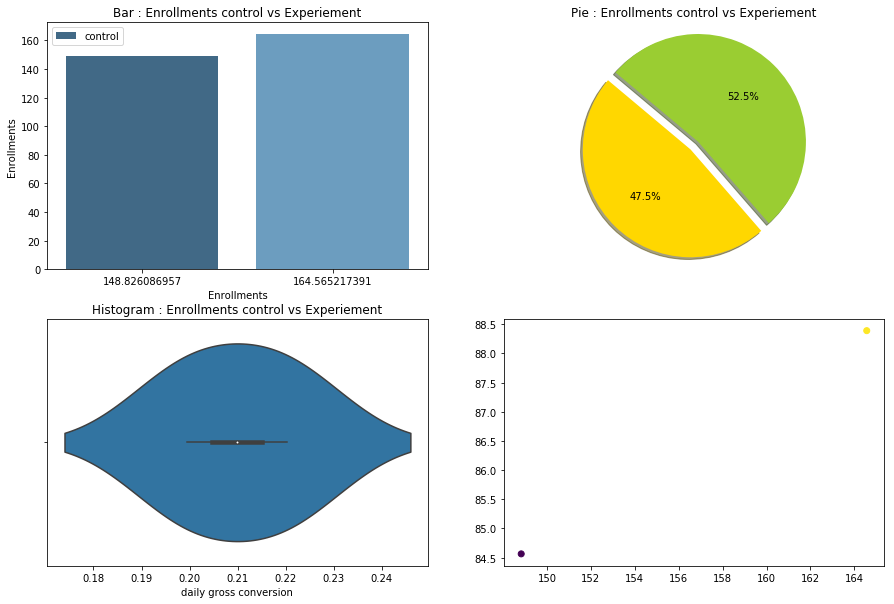

In [31]:
import plotly.plotly as py

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.title('Bar : Enrollments control vs Experiement')
sns.barplot( 'Enrollments',y='Enrollments',palette="Blues_d",data=groupdata,label='control')
#plt.legend(loc='best')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.title('Pie : Enrollments control vs Experiement')
#labels = 'control', 'experiment'
colors = ['gold', 'yellowgreen']
explode = (0.1, 0) 
plt.pie('Enrollments',data=groupdata, explode=explode, colors=colors,#label=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')


plt.subplot(2,2,3)
plt.title('Histogram : Enrollments control vs Experiement')
sns.violinplot(x = "daily gross conversion", data=groupdata)

plt.subplot(2,2,4)
colors = np.random.randint(0,5,2)
plt.scatter(groupdata['Enrollments'], groupdata['Payments'], c=colors)
plt.show()




# 2. Choose two continuous variables, and plot them three different ways.

## Scatter Chart  Pro :  Show relationship between 2 numberic variables, 
##                          Con : Can not show the number value of the bubble size
## Grid Chart       Pro : Show relationship among 3 variables as well as 1 number value again others
##                         Con : if the buzzle size is close to each others, it is hard to see the different
## lmplot chart   Pro : Show the regression between 2 number variables
##                         Con : Can not show the frequence of the distinct value

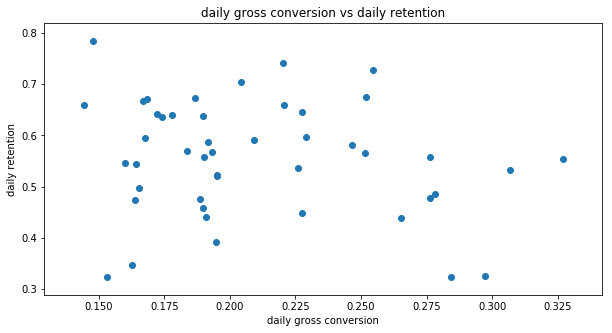

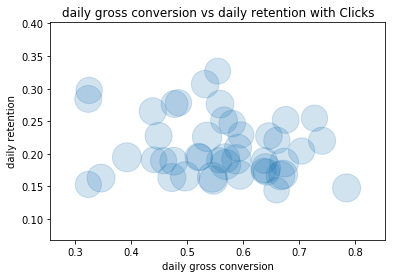

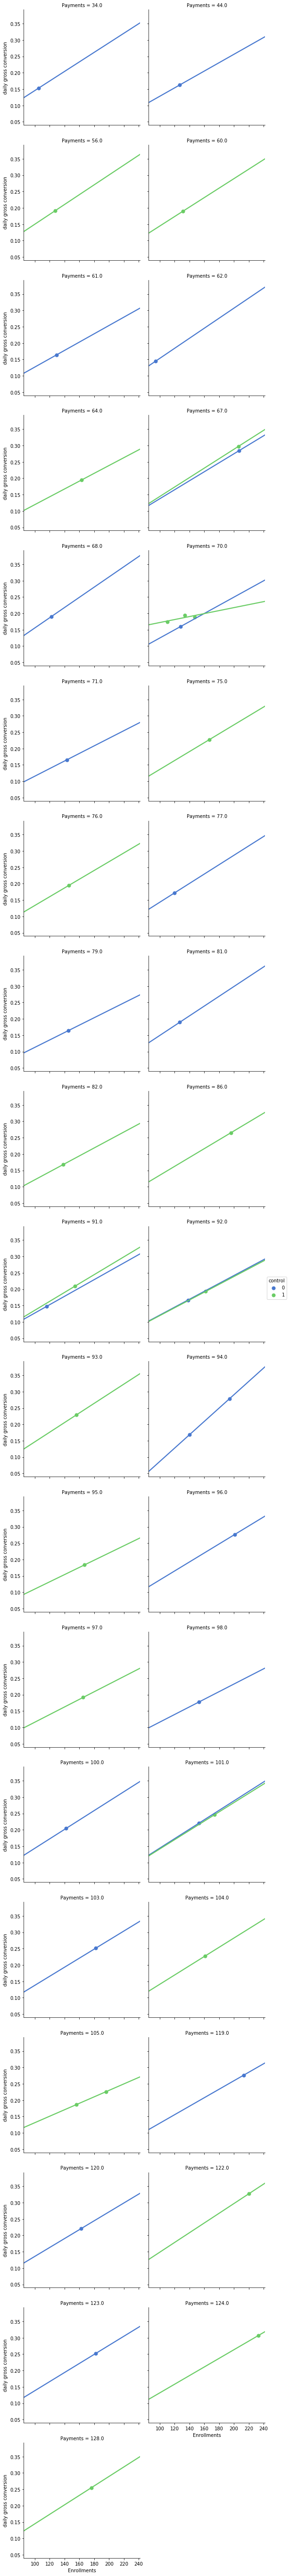

In [61]:
plt.figure(figsize=(10, 5))

#colors = np.random.randint(0,5,2)
plt.title('daily gross conversion vs daily retention')
plt.xlabel('daily gross conversion')
plt.ylabel('daily retention')
plt.scatter(webdf['daily gross conversion'], webdf['daily retention'])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.title('daily gross conversion vs daily retention with Clicks')
plt.xlabel('daily gross conversion')
plt.ylabel('daily retention')
ax.scatter(webdf['daily retention'],webdf['daily gross conversion'], s=webdf['Clicks'],alpha=0.2) # Added third variable income as size of the bubble


#https://seaborn.pydata.org/generated/seaborn.lmplot.html
sns.lmplot(x="Enrollments", y="daily gross conversion", col="Payments", hue="control", data=webdf,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

plt.show()

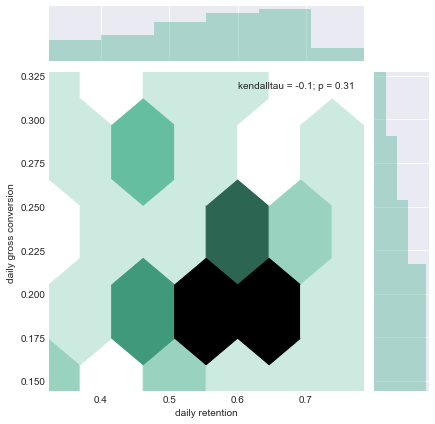

In [91]:
from scipy.stats import kendalltau
sns.jointplot(webdf['daily retention'], webdf['daily gross conversion'], kind="hex", stat_func=kendalltau, color="#4CB391")

# 3. Choose one continuous variable and one categorical variable, and plot them six different ways.

## boxplot Pro : Show the distribution of one variables , it easily spot to outlier, so it is good to use at the initial stage in machine learning
##         Con : Can not show relationship among variables, such as corr heat map

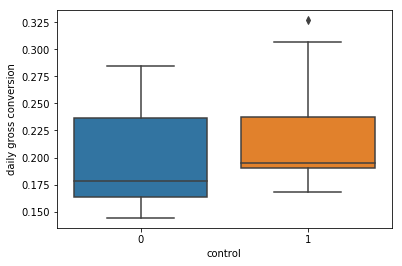

In [41]:
ax = sns.boxplot(x='control', y='daily gross conversion', hue=None, data=webdf, order=None, 
                    hue_order=None, orient=None, 
                    color=None, palette=None, 
                    saturation=.75, width=.8, 
                    fliersize=5, linewidth=None, 
                    whis=1.5, notch=False, ax=None)


## FacetGrid
## Pro : Quickly Spot the variable distribution
## Con : Only show one variable only, not correctlation with others

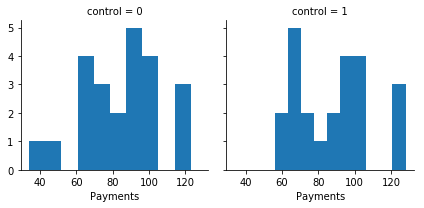

In [66]:
plt.figure(figsize=(25, 20))
g = sns.FacetGrid(webdf, col="control")
g.map(plt.hist, "Payments");
plt.show()

## pairplot
## Pro : Show the distribution as well as relationship with another variables
## Con : If pass too manyy variables , it may be hard to see

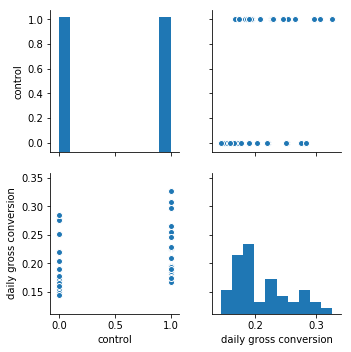

In [72]:
sns.pairplot(webdf, vars=["control", "daily gross conversion"],hue=None ,palette="husl")    

## Line chart   Pro : Good to see the trend by time series and compare time variable
##              Con : Cant see distribution, correlation data

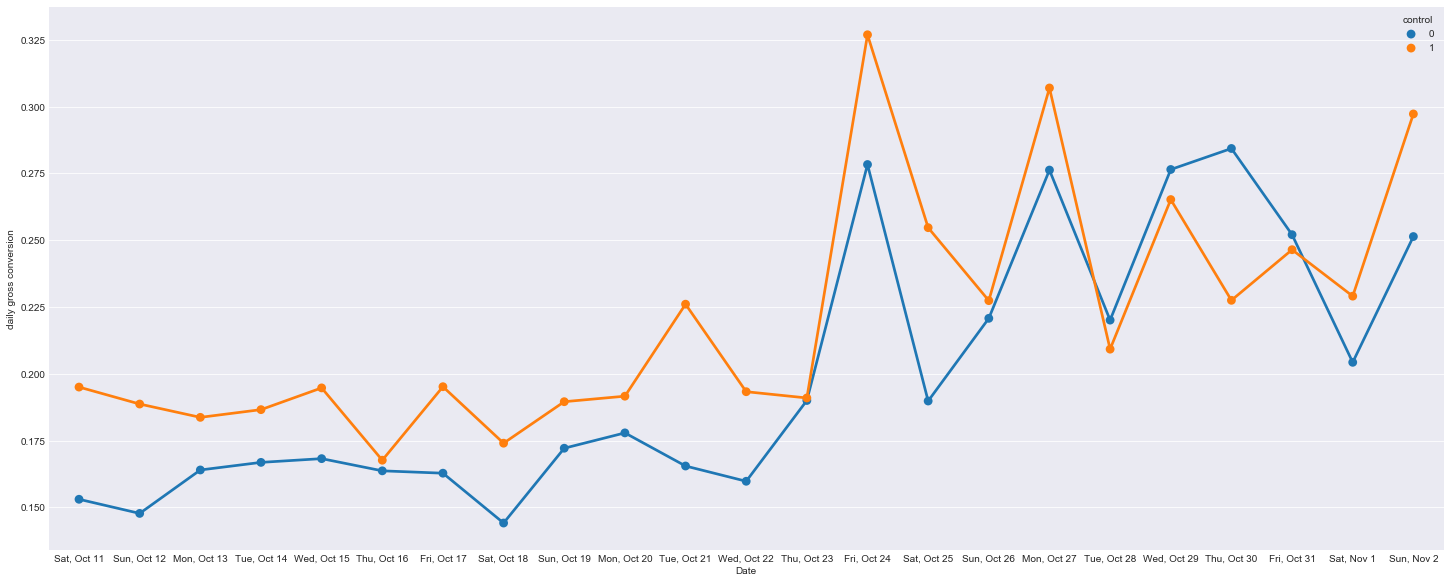

In [77]:
plt.figure(figsize=(25, 10))
sns.set_style("darkgrid")
#tips = sns.load_dataset("webdf")
ax = sns.pointplot(x="Date", y="daily gross conversion", data=webdf,hue='control')

In [102]:
## FacetGrid with regplot Pro : Show relationship one by one within variables
##           Con: Hard to arrange and see if the variables have too many distinct value

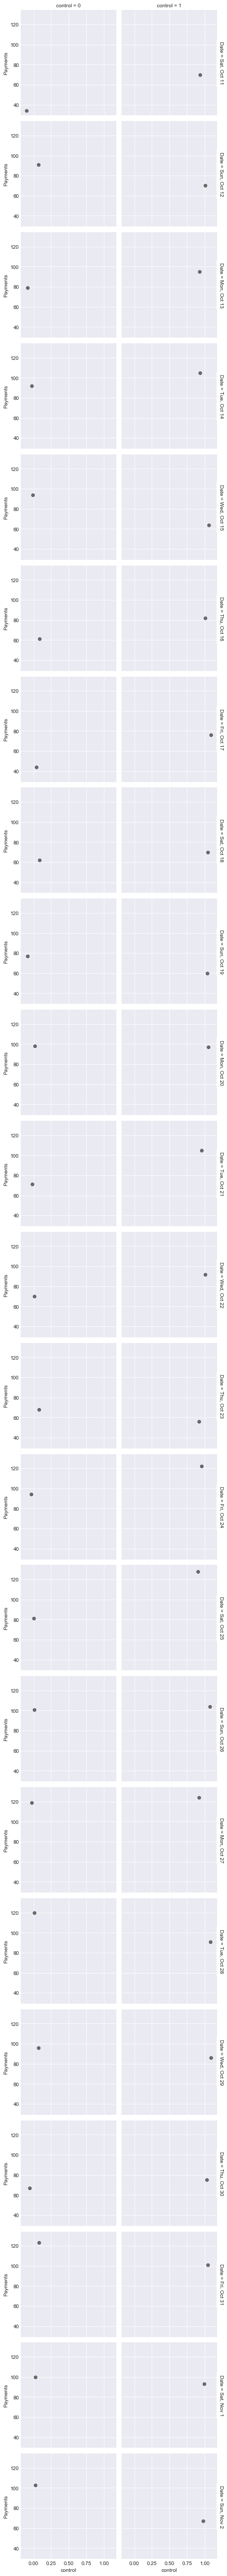

In [113]:
plt.figure(figsize=(25, 10))
g = sns.FacetGrid(webdf, row="Date", col="control", margin_titles=True)
g.map(sns.regplot, "control", "Payments", color=".3", fit_reg=False, x_jitter=.1);
plt.show()

In [ ]:
## FacetGrid with bar chart  Pro : Easy to spot relationship among variables separately
##                           Con : Data have to be aggregate before plotting, otherwise too many chart that lead messy

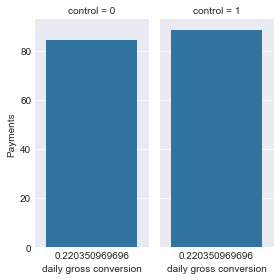

In [111]:
plt.figure(figsize=(100, 10))
g = sns.FacetGrid(groupdata, col="control", size=4, aspect=.5)
g.map(sns.barplot, "daily gross conversion", "Payments");
plt.show()

In [114]:
#labels = '% Female', '% Male'
controlsizes = [webdf['Pageviews'].sum()
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

SyntaxError: invalid syntax (<ipython-input-114-0e97a74799fb>, line 3)

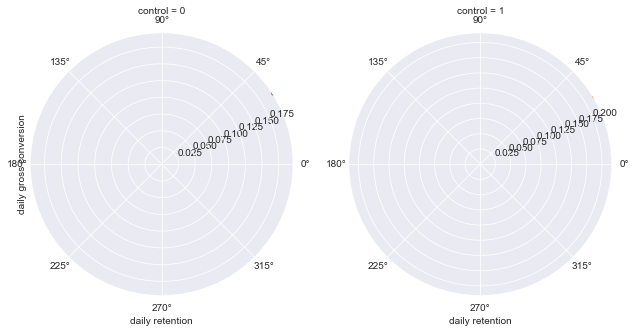

In [87]:

g = sns.FacetGrid(groupdata, col="control", hue="daily gross conversion",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(plt.scatter, "daily retention", "daily gross conversion",data=groupdata)

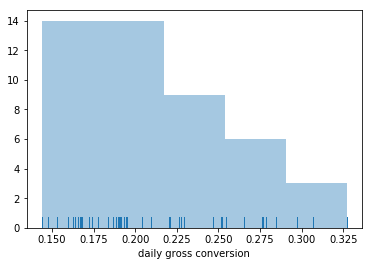

In [49]:
sns.distplot(webdf['daily gross conversion'], kde=False, rug=True);

### Pro : Easy to spot distrbution by each distinct of one colume and which associate with another variable

### Cons : Not for continuous variable


### Pro :  Easy to spot the relationship between 2 variables
### Con : Not for categories variables

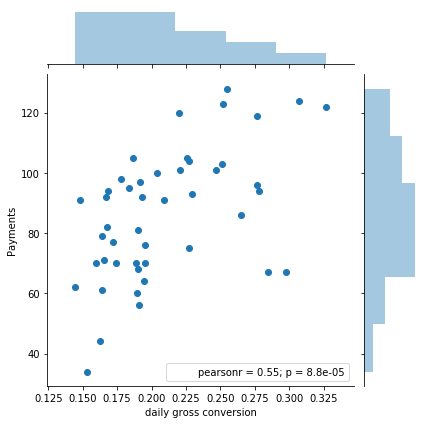

In [68]:
sns.jointplot(x="daily gross conversion", y="Payments", data=webdf);

## Pro  | Good for categories with less distinct value | clear to spot 

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:2567: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


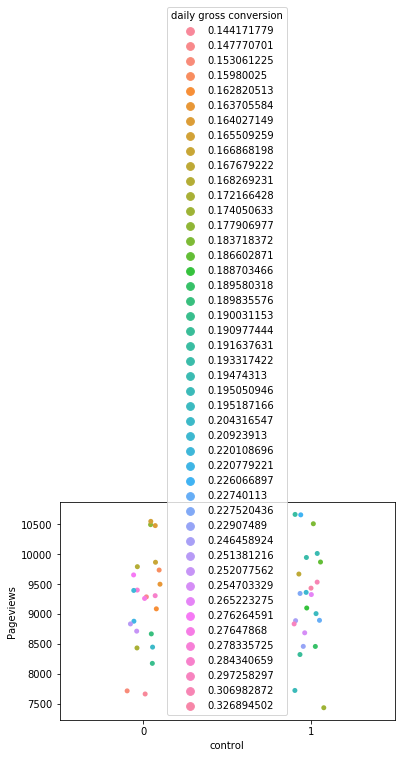

In [35]:
ax = sns.stripplot(x='control', y='Pageviews', hue='daily gross conversion', data=webdf, order=None, 
                      hue_order=None, jitter=True, 
                      split=False, orient=None, 
                      color=None, palette=None, size=5, 
                      edgecolor="gray", linewidth=0, 
                      ax=None)

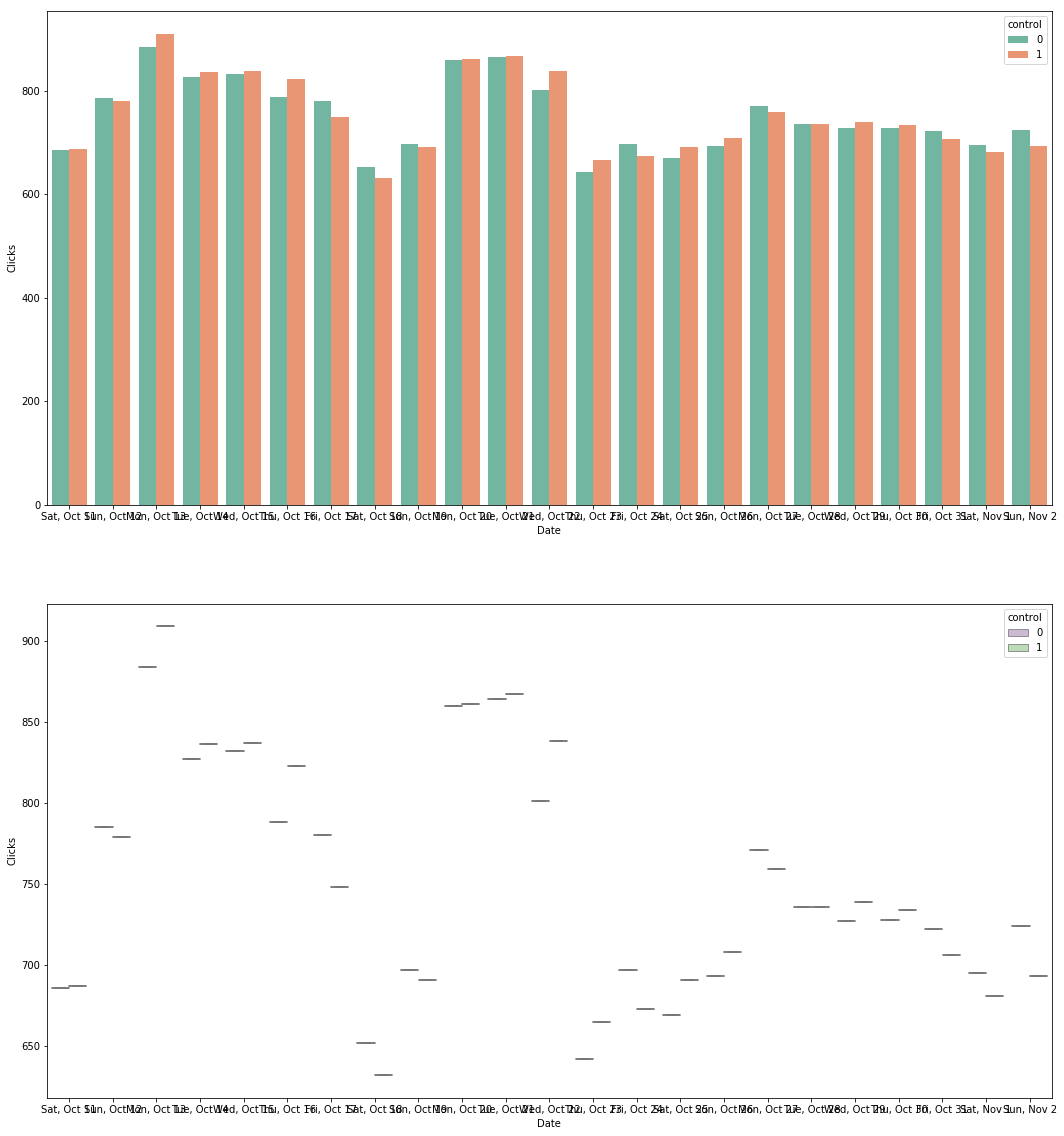

In [30]:
plt.figure(figsize=(18, 20))
plt.subplot(2, 1, 1)
sns.barplot(data=webdf,x='Date',hue='control',y='Clicks',palette="Set2")
plt.subplot(2, 1, 2)
sns.boxplot(x="Date", y="Clicks", hue="control", data=webdf, palette="PRGn")  